In [20]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
beatafaron_fmcg_daily_sales_data_to_2022_2024_path = kagglehub.dataset_download('beatafaron/fmcg-daily-sales-data-to-2022-2024')

print('Data source import complete.')


Data source import complete.


In [21]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import datetime

# --- Utility Libraries ---
import warnings     # To handle warning messages
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore") # Suppress warnings for a cleaner notebook output
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fmcg-daily-sales-data-to-2022-2024/weekly_df_final_for_modeling.csv
/kaggle/input/fmcg-daily-sales-data-to-2022-2024/FMCG_2022_2024.csv
/kaggle/input/fmcg-daily-sales-data-to-2022-2024/df_weekly_MI-006_enriched.csv
/kaggle/input/fmcg-daily-sales-data-to-2022-2024/batch_MI-006_2025-01-27.parquet
/kaggle/input/fmcg-daily-sales-data-to-2022-2024/batch_MI-006_2025-01-06.parquet
/kaggle/input/fmcg-daily-sales-data-to-2022-2024/batch_MI-006_2025-01-13.parquet
/kaggle/input/fmcg-daily-sales-data-to-2022-2024/batch_MI-006_2025-01-20.parquet


In [22]:
df = pd.read_csv(f'{beatafaron_fmcg_daily_sales_data_to_2022_2024_path}/FMCG_2022_2024.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [23]:
df.isnull().sum()

,0
date,0
sku,0
brand,0
segment,0
category,0
channel,0
region,0
pack_type,0
price_unit,0
promotion_flag,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190757 entries, 2022-01-21 to 2024-12-31
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sku              190757 non-null  int64  
 1   brand            190757 non-null  int64  
 2   segment          190757 non-null  int64  
 3   category         190757 non-null  int64  
 4   channel          190757 non-null  int64  
 5   region           190757 non-null  int64  
 6   pack_type        190757 non-null  int64  
 7   price_unit       190757 non-null  float64
 8   promotion_flag   190757 non-null  int64  
 9   delivery_days    190757 non-null  int64  
 10  stock_available  190757 non-null  int64  
 11  delivered_qty    190757 non-null  int64  
 12  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 20.4 MB


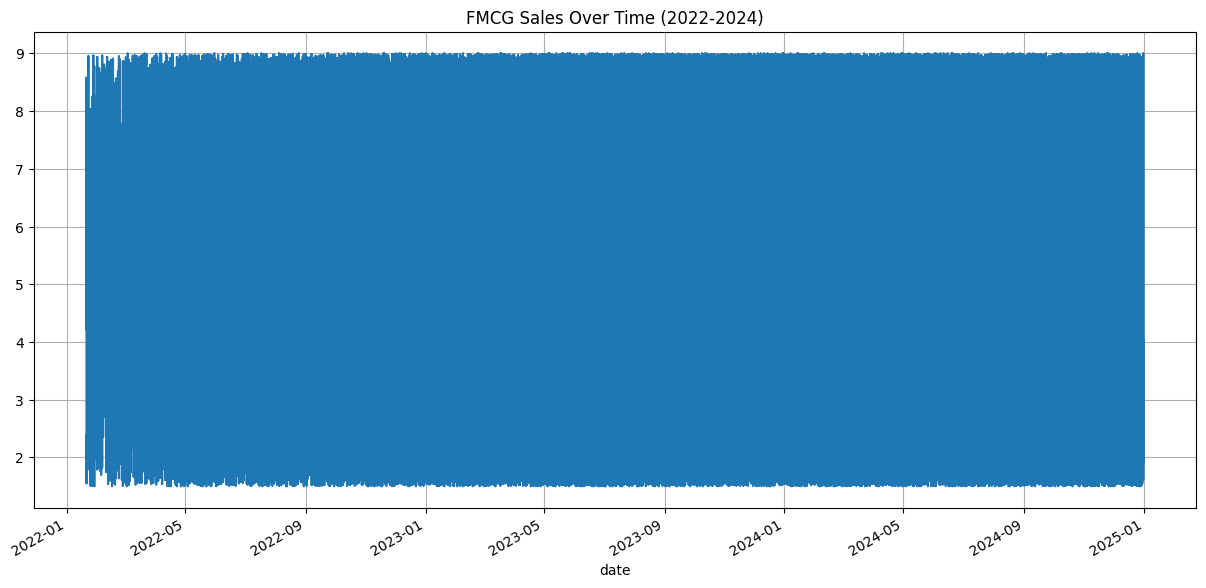

In [25]:
from sklearn.preprocessing import LabelEncoder


df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Sort the data by date to ensure it's in chronological order
df.sort_index(inplace=True)


encoded_features = ['sku', 'brand', 'segment', 'category', 'channel', 'region', 'pack_type']

for col in encoded_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])



df.info()
df = df[df['price_unit'] >= 0]

# --- Visualize the Sales Over Time ---
# This helps us see trends, seasonality, and any outliers.
plt.figure(figsize=(15, 7))
df['price_unit'].plot()
plt.title('FMCG Sales Over Time (2022-2024)')
plt.grid(True)
plt.show()






In [26]:
# Create features from the datetime index
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['day_of_year'] = df.index.dayofyear
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter

# --- Create Lag Features ---
# Lag features use past sales data to predict future sales.
# We'll use a 1-day lag (yesterday's sales) and a 7-day lag (sales from last week).
df['sales_lag_1'] = df['price_unit'].shift(1)
df['sales_lag_7'] = df['price_unit'].shift(7)

# --- Create Rolling Window Features ---
# A rolling average helps smooth out short-term fluctuations.
df['sales_rolling_mean_7'] = df['price_unit'].shift(1).rolling(window=7).mean()

# Drop any rows with NaN values that were created by the shift/rolling operations
df.dropna(inplace=True)

print("New features created. DataFrame head:")
df.head()


New features created. DataFrame head:


,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,...,delivered_qty,units_sold,day_of_week,day_of_year,month,year,quarter,sales_lag_1,sales_lag_7,sales_rolling_mean_7
date,,,,,,,,,,,,,,,,,,,,,
2022-01-21,2,1,3,1,1,2,0,4.21,0,3,...,185,17,4,21,1,2022,1,8.58,2.38,4.917143
2022-01-22,2,1,3,1,2,0,0,8.27,0,2,...,161,14,5,22,1,2022,1,4.21,1.55,5.178571
2022-01-22,2,1,3,1,2,1,0,5.66,0,5,...,192,5,5,22,1,2022,1,8.27,4.00,6.138571
2022-01-22,2,1,3,1,0,0,0,2.60,1,5,...,249,38,5,22,1,2022,1,5.66,5.16,6.375714
2022-01-22,2,1,3,1,0,1,1,3.86,0,3,...,198,12,5,22,1,2022,1,2.60,7.66,6.010000


In [27]:
print("\n--- Step 4: Splitting the Data ---")

# The target is the 'price_unit' column
y = df['price_unit']
# The features are all the other columns we created
X = df.drop('price_unit', axis=1)

# --- Time-Series Train-Test Split ---
# IMPORTANT: For time-series, we cannot shuffle the data.
# We must split it chronologically. The model trains on the past to predict the future.
# We'll use the data up to the end of 2023 for training and 2024 for testing.
X_train = X[X.index < '2024-01-01']
X_test = X[X.index >= '2024-01-01']
y_train = y[y.index < '2024-01-01']
y_test = y[y.index >= '2024-01-01']

print(f"Training set size: {len(X_train)} instances")
print(f"Testing set size: {len(X_test)} instances")


--- Step 4: Splitting the Data ---
Training set size: 106790 instances
Testing set size: 83960 instances


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_model = SGDRegressor(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)

# Evaluate SGD Model
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
print(f"SGD - Mean Absolute Error (MAE): {mae_sgd:.2f}")
print(f"SGD - Root Mean Squared Error (RMSE): {rmse_sgd:.2f}")




SGD - Mean Absolute Error (MAE): 1.88
SGD - Root Mean Squared Error (RMSE): 2.17


In [29]:
# --- Model B: Random Forest Regressor (Recommended Model) ---
print("\n--- B. Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose = 1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")


# =============================================================================
# 6. VISUALIZE PREDICTIONS
# =============================================================================
print("\n--- Step 6: Visualizing Predictions vs. Actuals ---")

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({'Actual price_unit': y_test, 'Predicted price_unit (RF)': y_pred_rf})




--- B. Random Forest Regressor ---


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s


Random Forest - Mean Absolute Error (MAE): 1.89
Random Forest - Root Mean Squared Error (RMSE): 2.19

--- Step 6: Visualizing Predictions vs. Actuals ---


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.1s finished


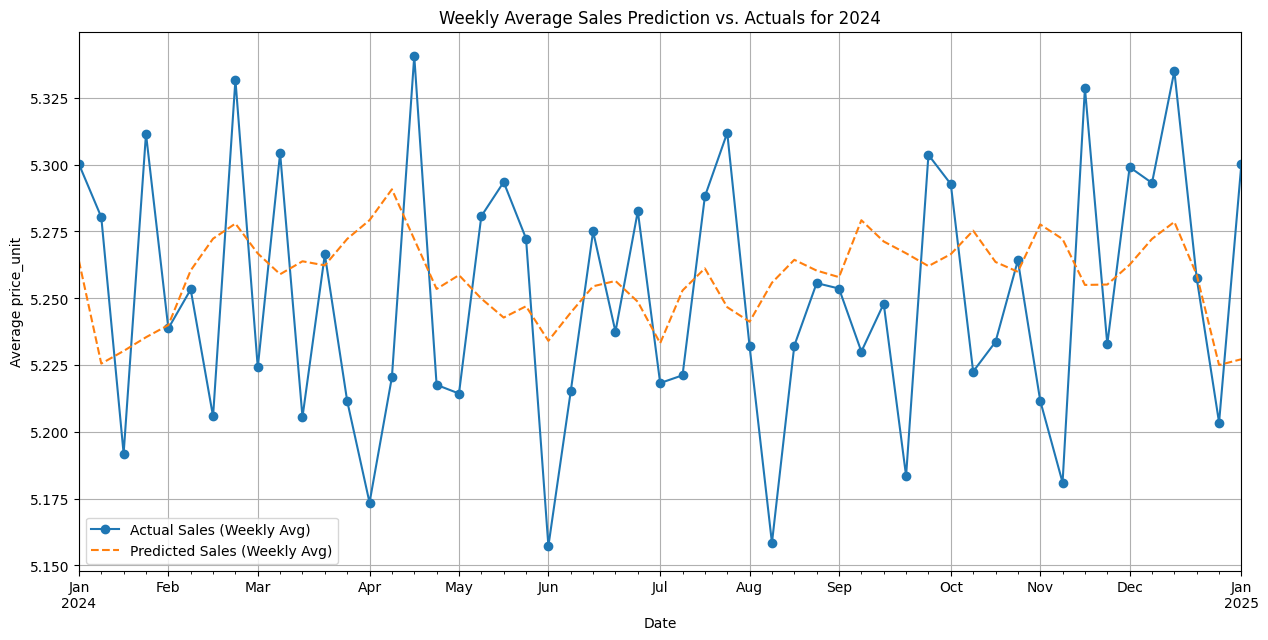

In [33]:
# Create a DataFrame for easy plotting
results_df = pd.DataFrame({'Actual price_unit': y_test, 'Predicted price_unit (RF)': y_pred_rf})

# Resample the data to a weekly frequency and calculate the mean
# 'W' stands for weekly. This will smooth out the daily noise.
weekly_results = results_df.resample('W').mean()

plt.figure(figsize=(15, 7))
weekly_results['Actual price_unit'].plot(label='Actual Sales (Weekly Avg)', style='-', marker='o')
weekly_results['Predicted price_unit (RF)'].plot(label='Predicted Sales (Weekly Avg)', style='--')
plt.title('Weekly Average Sales Prediction vs. Actuals for 2024')
plt.xlabel('Date')
plt.ylabel('Average price_unit')
plt.legend()
plt.grid(True)
plt.show()